<a href="https://colab.research.google.com/github/JSEFERINO/Dise-o_de_Experimentos_DOE/blob/main/1_DCA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
import logging
logging.getLogger('rpy2').setLevel(logging.ERROR)

In [3]:
%%R
install.packages("gridExtra")
install.packages("ggplot2")
library(gridExtra)
library(ggplot2)

In [4]:
%%R
# Datos del Problema Tipos de Cuero T.CUERO
A<-c(264, 260, 258, 241, 262, 255)
B<-c(208, 220, 216, 200, 213, 206)
C<-c(220, 263, 219, 225, 230, 228)
D<-c(217, 226, 215, 224, 220, 222)

In [5]:
%%R
T.CUERO <-matrix(c(A, B, C, D),nrow = 6,ncol = 4)
T.CUERO

     [,1] [,2] [,3] [,4]
[1,]  264  208  220  217
[2,]  260  220  263  226
[3,]  258  216  219  215
[4,]  241  200  225  224
[5,]  262  213  230  220
[6,]  255  206  228  222


In [6]:
%%R
colnames(T.CUERO)<-c("A", "B", "C", "D")
T.CUERO

       A   B   C   D
[1,] 264 208 220 217
[2,] 260 220 263 226
[3,] 258 216 219 215
[4,] 241 200 225 224
[5,] 262 213 230 220
[6,] 255 206 228 222


In [7]:
%%R
rownames(T.CUERO)<-c("1","2","3","4","5","6")
T.CUERO

    A   B   C   D
1 264 208 220 217
2 260 220 263 226
3 258 216 219 215
4 241 200 225 224
5 262 213 230 220
6 255 206 228 222


In [8]:
%%R
summary(T.CUERO)

       A               B               C               D        
 Min.   :241.0   Min.   :200.0   Min.   :219.0   Min.   :215.0  
 1st Qu.:255.8   1st Qu.:206.5   1st Qu.:221.2   1st Qu.:217.8  
 Median :259.0   Median :210.5   Median :226.5   Median :221.0  
 Mean   :256.7   Mean   :210.5   Mean   :230.8   Mean   :220.7  
 3rd Qu.:261.5   3rd Qu.:215.2   3rd Qu.:229.5   3rd Qu.:223.5  
 Max.   :264.0   Max.   :220.0   Max.   :263.0   Max.   :226.0  


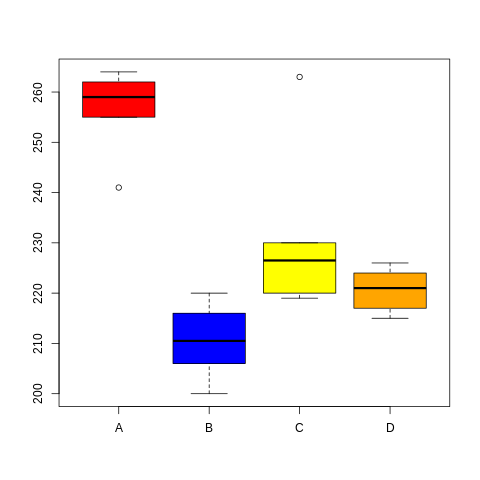

In [9]:
%%R
boxplot(T.CUERO, col=c("red", "blue", "yellow", "orange"))

In [10]:
%%R
set.seed(7638)
T.CUERO2 <- factor( rep( c("A", "B", "C","D" ), each = 6))
Desgaste <- c(264,  260,    258,    241,    262,    255, 208,   220,    216,    200,    213,    206, 220,   263,    219,    225,    230,    228, 217,   226,    215,    224,    220,    222)
DCA <- data.frame( T.CUERO2, Desgaste )
DCA

   T.CUERO2 Desgaste
1         A      264
2         A      260
3         A      258
4         A      241
5         A      262
6         A      255
7         B      208
8         B      220
9         B      216
10        B      200
11        B      213
12        B      206
13        C      220
14        C      263
15        C      219
16        C      225
17        C      230
18        C      228
19        D      217
20        D      226
21        D      215
22        D      224
23        D      220
24        D      222


In [11]:
%%R
summary(DCA, f=TRUE)

 T.CUERO2    Desgaste    
 A:6      Min.   :200.0  
 B:6      1st Qu.:216.8  
 C:6      Median :223.0  
 D:6      Mean   :229.7  
          3rd Qu.:244.5  
          Max.   :264.0  


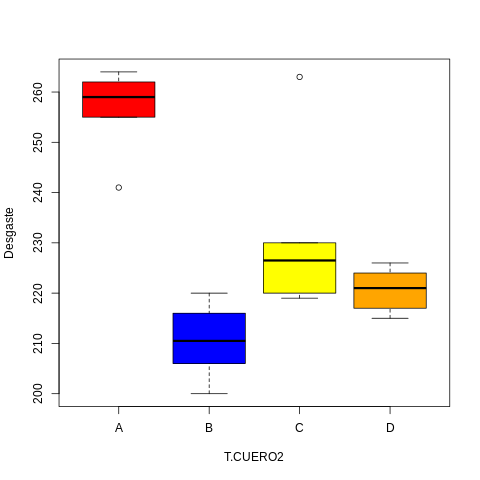

In [12]:
%%R
plot(Desgaste ~ T.CUERO2, data=DCA, col=c("red", "blue", "yellow", "orange"))

In [14]:
%%R
g <- lm(Desgaste ~ T.CUERO2, data=DCA)
summary(g)


Call:
lm(formula = Desgaste ~ T.CUERO2, data = DCA)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.667  -4.792  -0.750   3.833  32.167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  256.667      4.112  62.419  < 2e-16 ***
T.CUERO2B    -46.167      5.815  -7.939 1.31e-07 ***
T.CUERO2C    -25.833      5.815  -4.442  0.00025 ***
T.CUERO2D    -36.000      5.815  -6.191 4.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 20 degrees of freedom
Multiple R-squared:  0.7771,	Adjusted R-squared:  0.7436 
F-statistic: 23.24 on 3 and 20 DF,  p-value: 1.002e-06



In [15]:
%%R
anova(g)

Analysis of Variance Table

Response: Desgaste
          Df Sum Sq Mean Sq F value    Pr(>F)    
T.CUERO2   3 7072.3 2357.44  23.238 1.002e-06 ***
Residuals 20 2029.0  101.45                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
%%R
names(g)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


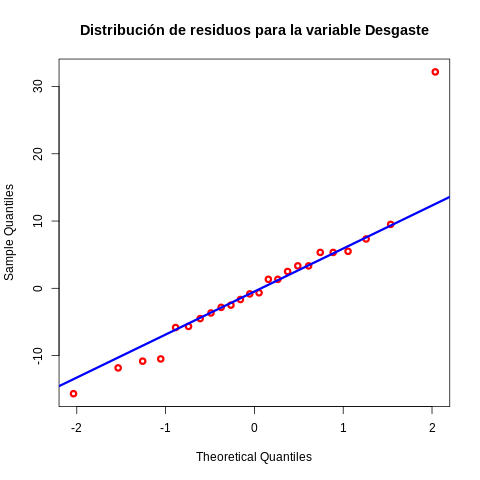

In [17]:
%%R
qqnorm(g$res, main = "Distribución de residuos para la variable Desgaste",col="red", lwd=3)
qqline(g$res, col="blue", lwd=3)

In [20]:
%%R
mean(g$res)

[1] -9.138921e-18


In [19]:
%%R
sd(g$res)

[1] 9.392411


In [21]:
%%R
g$res

          1           2           3           4           5           6 
  7.3333333   3.3333333   1.3333333 -15.6666667   5.3333333  -1.6666667 
          7           8           9          10          11          12 
 -2.5000000   9.5000000   5.5000000 -10.5000000   2.5000000  -4.5000000 
         13          14          15          16          17          18 
-10.8333333  32.1666667 -11.8333333  -5.8333333  -0.8333333  -2.8333333 
         19          20          21          22          23          24 
 -3.6666667   5.3333333  -5.6666667   3.3333333  -0.6666667   1.3333333 


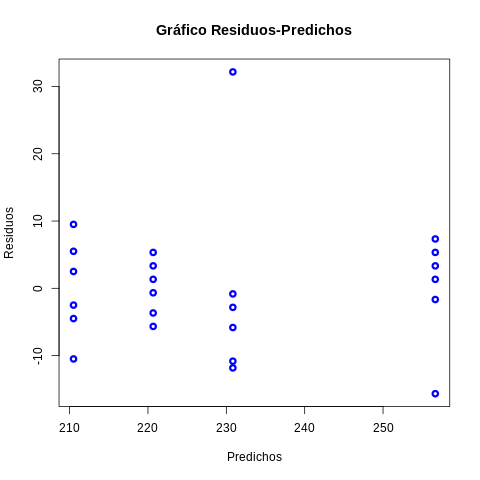

In [22]:
%%R
plot(g$fit,g$res,xlab="Predichos",ylab="Residuos",
main="Gráfico Residuos-Predichos", col="blue", lwd=3)

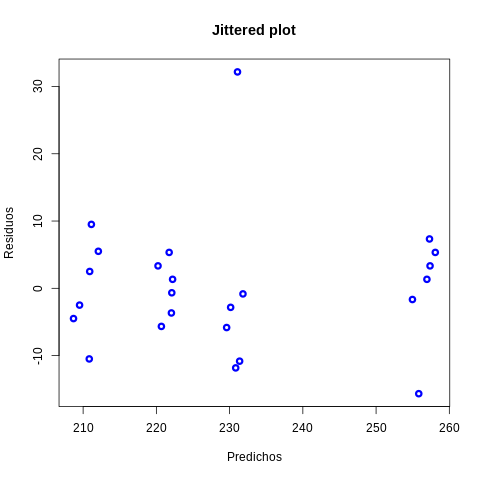

In [23]:
%%R
plot(jitter(g$fit),g$res,xlab="Predichos",ylab="Residuos",
main="Jittered plot", col="blue", lwd=3)

In [24]:
%%R
g <- lm(Desgaste ~ T.CUERO2, data=DCA)
summary(g)


Call:
lm(formula = Desgaste ~ T.CUERO2, data = DCA)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.667  -4.792  -0.750   3.833  32.167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  256.667      4.112  62.419  < 2e-16 ***
T.CUERO2B    -46.167      5.815  -7.939 1.31e-07 ***
T.CUERO2C    -25.833      5.815  -4.442  0.00025 ***
T.CUERO2D    -36.000      5.815  -6.191 4.78e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 20 degrees of freedom
Multiple R-squared:  0.7771,	Adjusted R-squared:  0.7436 
F-statistic: 23.24 on 3 and 20 DF,  p-value: 1.002e-06



In [25]:
%%R
DCA$T.CUERO2 <- relevel(DCA$T.CUERO2,ref="B")
g <- lm(Desgaste ~ T.CUERO2, data=DCA)
summary(g)


Call:
lm(formula = Desgaste ~ T.CUERO2, data = DCA)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.667  -4.792  -0.750   3.833  32.167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  210.500      4.112  51.192  < 2e-16 ***
T.CUERO2A     46.167      5.815   7.939 1.31e-07 ***
T.CUERO2C     20.333      5.815   3.497  0.00227 ** 
T.CUERO2D     10.167      5.815   1.748  0.09575 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 20 degrees of freedom
Multiple R-squared:  0.7771,	Adjusted R-squared:  0.7436 
F-statistic: 23.24 on 3 and 20 DF,  p-value: 1.002e-06



In [27]:
%%R
anova(g)

Analysis of Variance Table

Response: Desgaste
          Df Sum Sq Mean Sq F value    Pr(>F)    
T.CUERO2   3 7072.3 2357.44  23.238 1.002e-06 ***
Residuals 20 2029.0  101.45                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
